In [4]:
import pandas as pd
from sklearn.datasets import load_iris

### Let's load our favourite IRIS data

In [5]:
# iris = load_iris()
df = pd.read_csv('bills.csv')

In [6]:
df

,Age (years),Blood Pressure,Blood Sugar,Diabetic,Medical Bill (INR)
0,62,103,115,1,5046.41
1,41,102,131,1,4076.62
2,63,104,121,1,5188.30
3,44,95,129,1,3984.08
4,28,68,71,0,2226.88
...,...,...,...,...,...
495,9,67,72,0,1519.38
496,21,72,92,0,1956.70
497,51,107,114,1,4663.46
498,89,143,150,1,8526.37


### Split the features and target variables

In [8]:
# features = pd.DataFrame(iris.data, columns=iris.feature_names)
features = df.drop(columns='Diabetic')

In [9]:
features

,Age (years),Blood Pressure,Blood Sugar,Medical Bill (INR)
0,62,103,115,5046.41
1,41,102,131,4076.62
2,63,104,121,5188.30
3,44,95,129,3984.08
4,28,68,71,2226.88
...,...,...,...,...
495,9,67,72,1519.38
496,21,72,92,1956.70
497,51,107,114,4663.46
498,89,143,150,8526.37


In [10]:
# target = pd.array(iris.target)
target = df['Diabetic']

In [11]:
# features
target

0      1
1      1
2      1
3      1
4      0
      ..
495    0
496    0
497    1
498    1
499    0
Name: Diabetic, Length: 500, dtype: int64

In [6]:
# target

<IntegerArray>
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 ...
 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Length: 150, dtype: Int32

### Prepare Training and Testing datasets

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=10)

### Build the model

In [13]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
features.columns

Index(['Age (years)', 'Blood Pressure', 'Blood Sugar', 'Medical Bill (INR)'], dtype='object')

### Plot the Decision Tree

[]

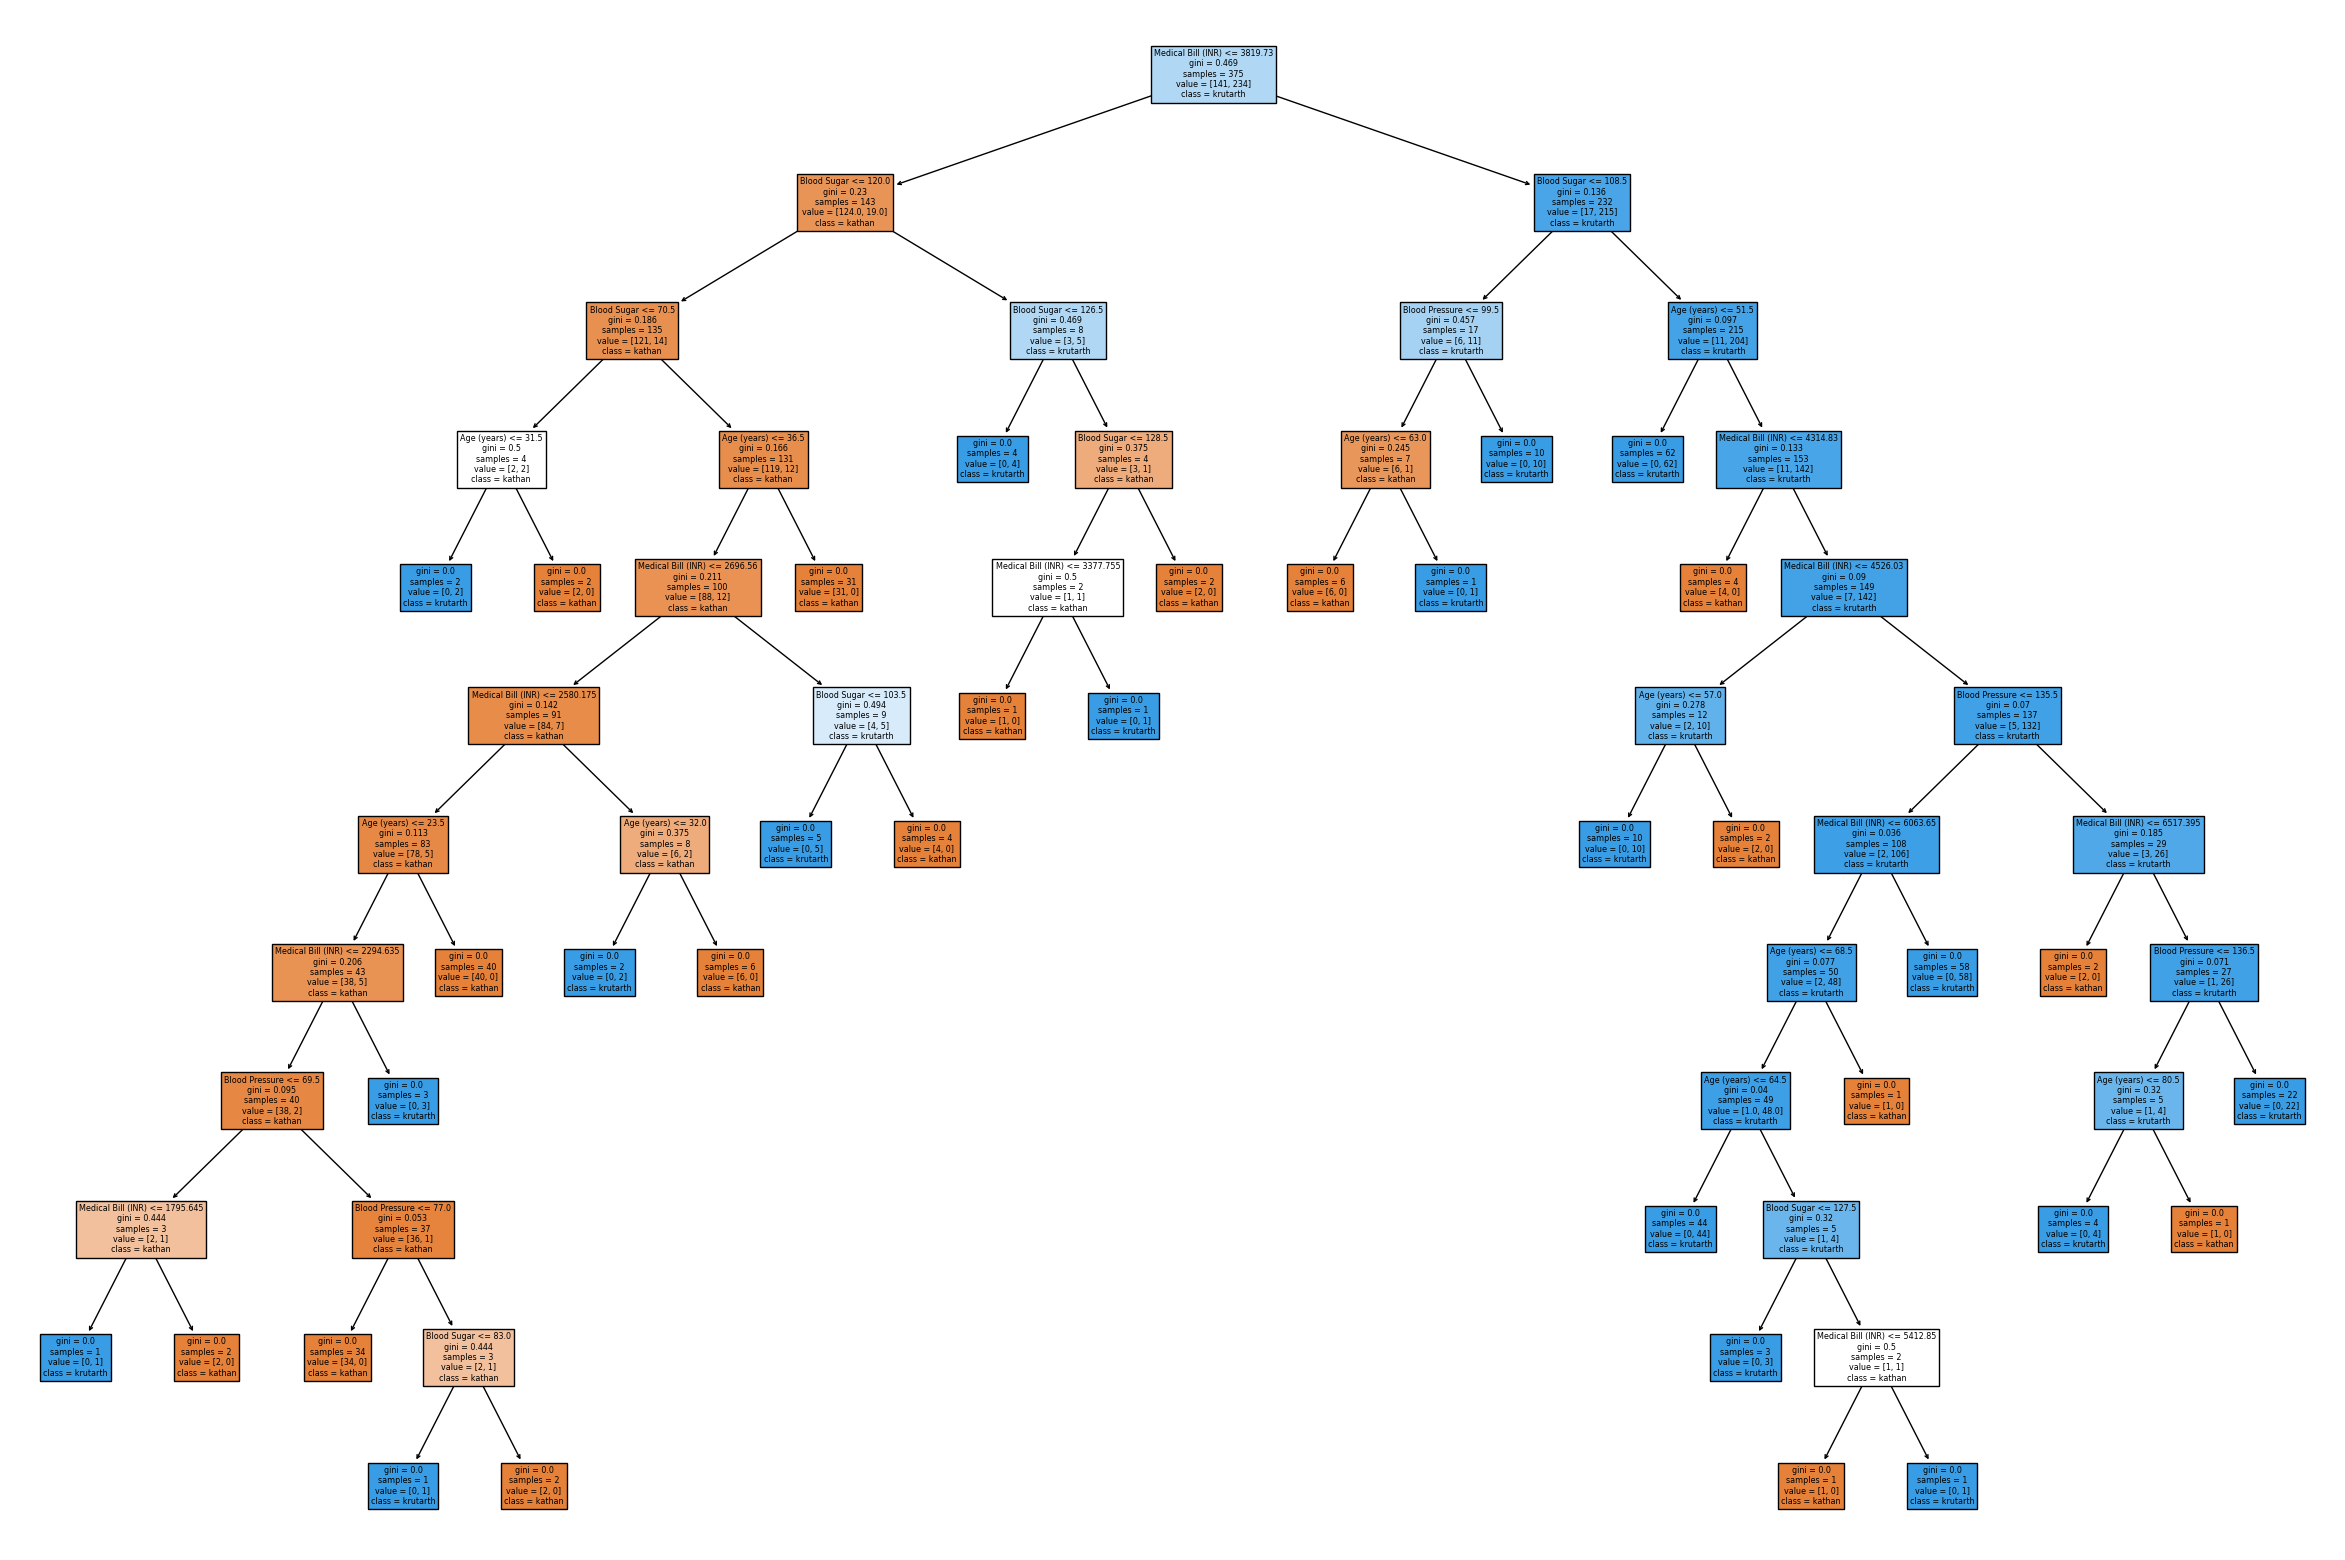

In [29]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(30,20))
# plot_tree(model, filled=True, feature_names=(features.columns), class_names=['1','0'])
plot_tree(model, filled=True, feature_names=(features.columns), class_names=['kathan','krutarth'])
# plot_tree(model)
plt.plot()

#Gini Impurity(df) = 1- p²(0)-p²(1) 

### Check the accuracy with prediction and confusion matrix

In [19]:
pred = model.predict(X_test)

In [20]:
pred

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0], dtype=int64)

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [22]:
cm = confusion_matrix(y_true=y_test, y_pred=pred)

In [23]:
disp = ConfusionMatrixDisplay(cm, display_labels=['1','0'])

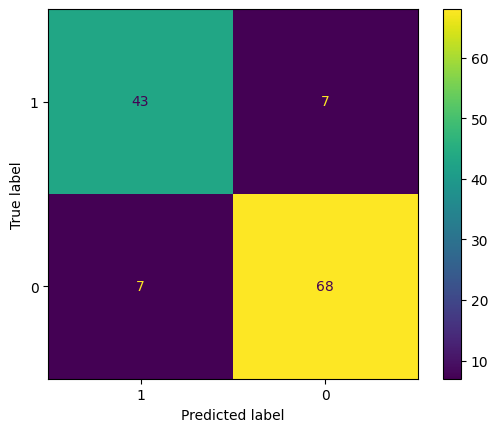

In [24]:
disp.plot()

In [25]:
accScore = accuracy_score(y_test, pred)
accScore

0.888